# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."
<br>
<br>
As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009. 


### Data Source
In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.
<br>
<br>
This data is part of a challenge offered by *drivendata.org* and the data can be found on [their homepage](https://www.drivendata.org/competitions/66/flu-shot-learning/data/).

#### Import necessary libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # show all columns
pd.set_option('display.max_rows', None) # show all rows
import numpy as np
from scipy import stats

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import missingno as msno

## ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import cross_val_score

## Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

## Evaluation
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

#### Import data 

In [2]:
# Train data
X_train = pd.read_csv('training_set_features.csv')
y_train = pd.read_csv('training_set_labels.csv')
# Test data for later on 
X_test = pd.read_csv('test_set_features.csv')

## Workflow steps
#### 1. Exploratory Data Analysis (EDA)
- Descriptive statistics for the training data
- Distributions for numerical features with histograms
- Distributions for categorical features with barcharts
#### 2. Preprocessing
- Missing values
- Outliers and Noise
- Encoding of categorical variables
- Cardinality for categorical features
#### 3. Feature Engineering and Selection 
- Can we create new features? 
- Which variables can be removed? 
#### 4. Modelling
- Fit the data to different classifiers
- Compare them all with cross-validation 
- See if we can improve the model by tuning the parameters
#### 5. Create Predictions
<br>
<br>

## 1. Exploratory Data Analysis (EDA)

The data at hand represents information about respondents in a survey that were asked questions about their backgrounds, opinions, and health behaviors.
With the help of this data we want to predict whether an individual has received the H1N1 vaccine and seasonal flu vaccine. 
<br>
<br>
We will train the model with the training features (X_train) and training labels (y_train) and give it some new data it hasn't seen before (X_test) to evaluate how well it classifies the new data. 
<br> 
<br>
As you can see below there's 26707 observations in the training set and 26708 in the test set. <br>
This is somewhat uncommon, since the training/test split is usually 80%/20% for train and test respectively, or 70/30. <br> However it won't affect our workflow. <br>
<br>
There are numerical and categorical variables in data. In the following we will have a closer look at those variables and: 
- look at descriptive statistics and distributions for the numerical variables
- look at descriptive statistics and distributions for the categorical variables
- look at the cardinality, i.e. the number of unique labels, for the categorical variables (at first glance it seems there are some labels that don't really make sense)


### Features in the dataset
For all binary variables: 0 = No; 1 = Yes.

#### Target variables (y)
In this case we have two target variables: 
- `h1n1_vaccine` - Whether respondent received H1N1 flu vaccine.
- `seasonal_vaccine` - Whether respondent received seasonal flu vaccine.

#### Features (X)
For all binary variables: 0 = No; 1 = Yes.

- `h1n1_concern` - Level of concern about the H1N1 flu.<br> 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- `h1n1_knowledge` - Level of knowledge about H1N1 flu.<br> 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
- `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
- `behavioral_face_mask` - Has bought a face mask. (binary)
- `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
- `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
- `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
- `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
- `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
- `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
- `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
- `health_worker` - Is a healthcare worker. (binary)
- `health_insurance` - Has health insurance. (binary)
- `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.<br> 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. <br> 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.<br> 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.<br> 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.<br> 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.<br> 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- `age_group` - Age group of respondent.
- `education` - Self-reported education level.
- `race` - Race of respondent.
- `sex` - Sex of respondent.
- `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- `marital_status` - Marital status of respondent.
- `rent_or_own` - Housing situation of respondent.
- `employment_status` - Employment status of respondent.
- `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- `household_adults` - Number of other adults in household, top-coded to 3.
- `household_children` - Number of children in household, top-coded to 3.
- `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
- `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

In [3]:
print('Dimensions training features: ', X_train.shape, 
'\nDimensions test features: ', X_test.shape,
'\nDimensions training labels: ', y_train.shape)

Dimensions training features:  (26707, 36) 
Dimensions test features:  (26708, 36) 
Dimensions training labels:  (26707, 3)


In [4]:
X_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
y_train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


#### Concatenate X_train and y_train
We will add the columns with the labels (y_train) to the dataframe so we can compare them. 

One note on *data leakage*: <br>
I used to create an 'X_all' df by concatenating X_train and X_test to do all the preprocessing in one step on the concatenated dataframe. However this is a bad idea, since it leads to *train-test contamination*. This happens when we include information from the training set in the test set, which makes our evaluation on the test set overly optimistic. In other words the test set isn't really "unseen data" for the model anymore, since some information leaked from the training set to the test set. 
Our model might therefore do great on the test set (and of course even better on the training set), but probably won't do as well in production or on truly unseen data. 



In [6]:
# Concatenate X_train and y_train
train_df = pd.concat([X_train, y_train])
print('Dimensions train: ', train_df.shape)

Dimensions train:  (53414, 38)


In [7]:
# Since respondent_id is a "is a unique and random identifier", we will set it as Id 
train_df.set_index('respondent_id', inplace=True)

### 1.1 Descriptive Statistics

In [8]:
# numerical features
train_num =  train_df.select_dtypes(include=np.number)
train_num.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [9]:
# categorical features
train_cat = train_df.select_dtypes(exclude=np.number)
train_cat.describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [10]:
# Unique values per categorical feature
def unique_per_col(df): 
    #Selecting only categorical cols
    cols = (df.dtypes == 'object')
    object_cols = list(cols[cols].index)
    #Count unique values
    object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
    d = dict(zip(object_cols, object_nunique))
    #Print number of unique entries by column, in ascending order
    print('Unique values per category:')
    print('='* len('Unique values per category:'))
    for row in sorted(d.items(), key=lambda x: x[1]):
        print(row)
    

unique_per_col(train_df)    

Unique values per category:
('sex', 2)
('marital_status', 2)
('rent_or_own', 2)
('income_poverty', 3)
('employment_status', 3)
('census_msa', 3)
('education', 4)
('race', 4)
('age_group', 5)
('hhs_geo_region', 10)
('employment_industry', 21)
('employment_occupation', 23)


In [11]:
# Percentage count for each label for the categorical variables
for col in train_df: 
    print(train_df[col].value_counts()/len(train_df[col])*100)

2.0    19.798180
1.0    15.263789
3.0     8.595125
0.0     6.170667
Name: h1n1_concern, dtype: float64
1.0    27.329914
2.0    17.761261
0.0     4.691654
Name: h1n1_knowledge, dtype: float64
0.0    47.431385
1.0     2.435691
Name: behavioral_antiviral_meds, dtype: float64
1.0    35.998053
0.0    13.612536
Name: behavioral_avoidance, dtype: float64
0.0    46.517767
1.0     3.446662
Name: behavioral_face_mask, dtype: float64
1.0    41.215786
0.0     8.705583
Name: behavioral_wash_hands, dtype: float64
0.0    31.963530
1.0    17.873591
Name: behavioral_large_gatherings, dtype: float64
0.0    33.032538
1.0    16.813944
Name: behavioral_outside_home, dtype: float64
1.0    33.700902
0.0    16.059460
Name: behavioral_touch_face, dtype: float64
0.0    35.831430
1.0    10.124686
Name: doctor_recc_h1n1, dtype: float64
0.0    30.802786
1.0    15.153331
Name: doctor_recc_seasonal, dtype: float64
0.0    34.534017
1.0    13.648107
Name: chronic_med_condition, dtype: float64
0.0    44.462126
1.0     

In [12]:
# Categorical variables vs numerical variables: 
print('% Numerical variables:', len(train_num.columns)/ len(train_df.columns) * 100, ', Number: ', len(train_num.columns))
print('% Categorical variables:', len(train_cat.columns)/ len(train_df.columns) * 100, ', Number: ', len(train_cat.columns))

% Numerical variables: 67.56756756756756 , Number:  25
% Categorical variables: 32.432432432432435 , Number:  12


After investigating some descriptive/summary statistics we can see that: 
- About two thirds of the variables are numerical and represent opinions from the respondents on a given topic
- There seem to be sum categorical variables that have strange values that don't make sense
- There aren't any variables that have a overly high cardinality, i.e. number of labels, we will see further on how we will encode them 
- There don't seem to be any outliers as the numerical variables are "limited" by the number of answers a respondent can give. In that sense we can think of the numerical variable as categorical variables really that hae already been encoded. 

In the following we will look graphically at the distributions of the variables.

### 1.2 Visualizing Distributions 
#### Numerical data 
We will use histograms and density plot to visualize all of the numerical features in the dataset.

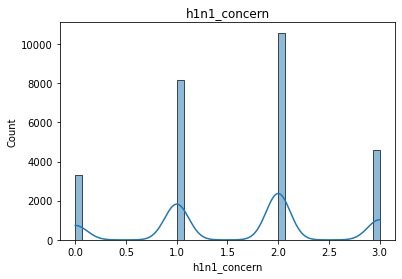

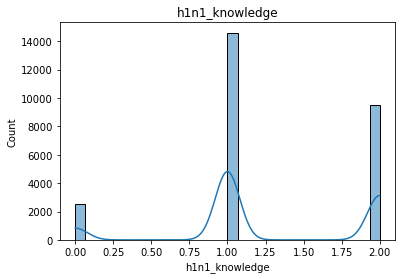

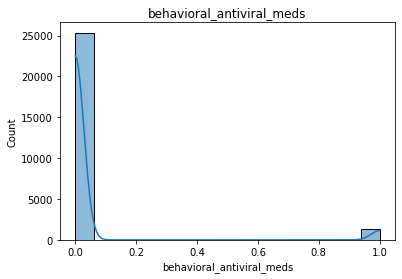

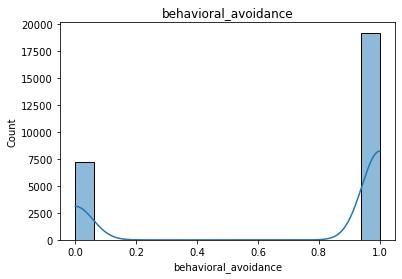

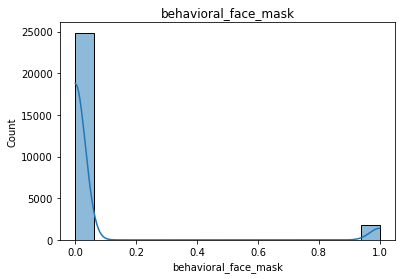

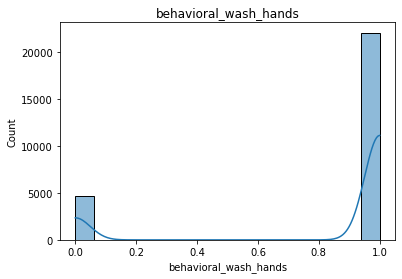

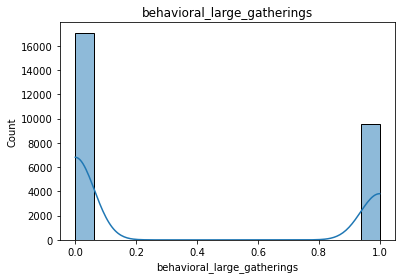

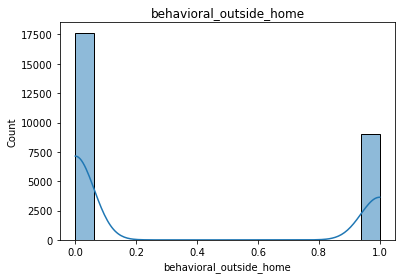

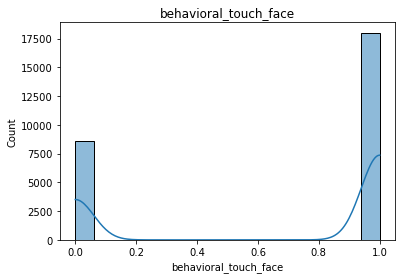

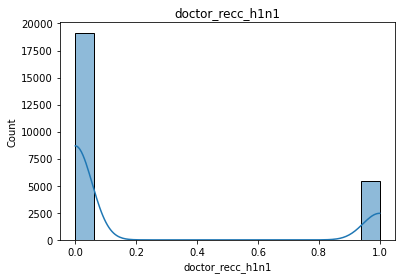

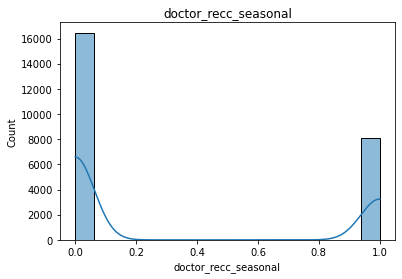

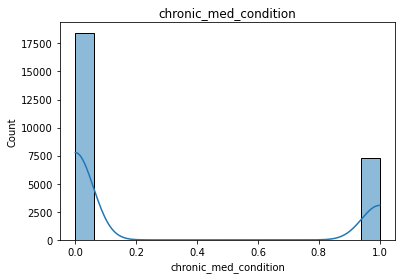

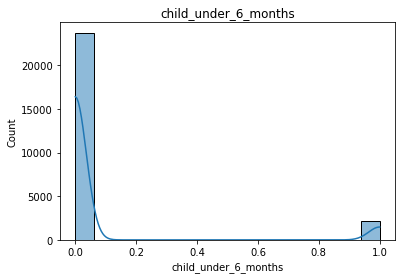

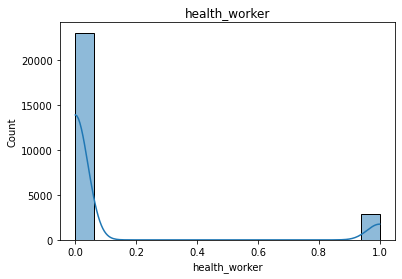

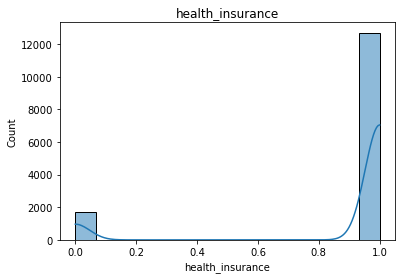

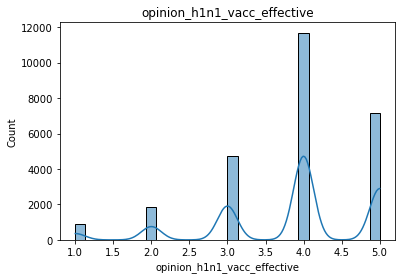

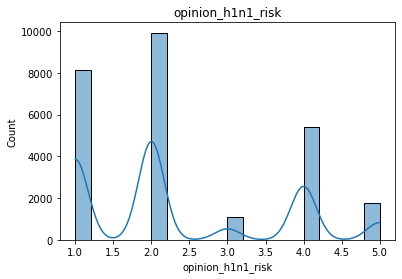

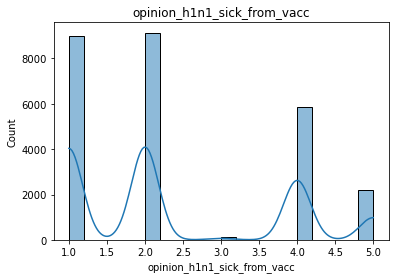

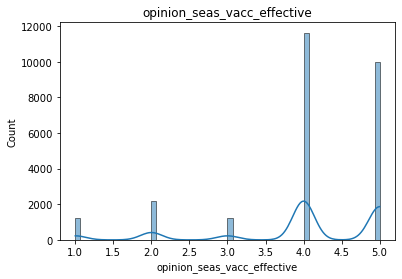

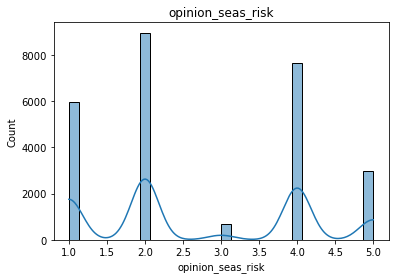

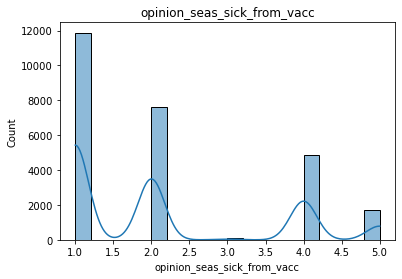

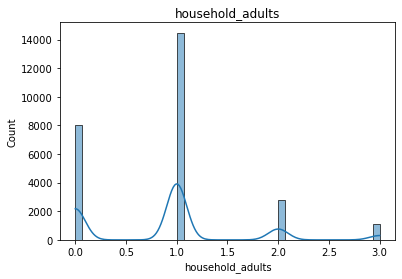

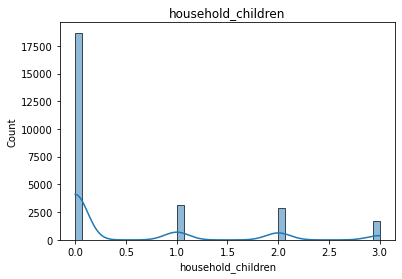

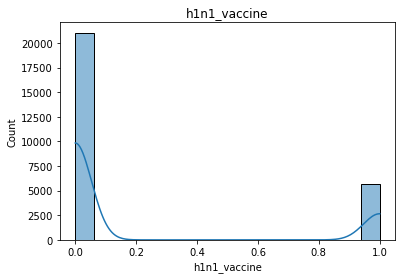

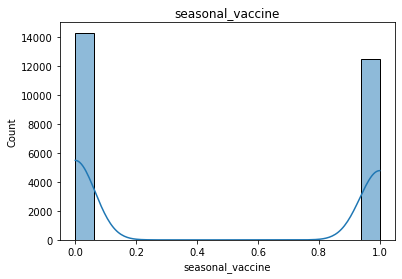

In [13]:
for col in train_num.columns: 
    sns.histplot(train_num[col], kde=True)
    plt.title(col)
    plt.show()

**Observations:**
- The majority of people are at least to some degree concerned with the h1n1 virus
- Almost all individuals don't have taken antiviral meds, but seem to have reduced contact with others with flu-like symptoms
- the large majority of people don't use facemasks
- The majority of people haven't been recommended the h1n1 vaccine, the same is true for the seasonal flu vaccine 
- The greatest part of people seem to believe the effectiveness of the h1n1 vaccine, while thinking that the vaccine has a low risk. 
    - This is also reflected in the fact that most of them are not worried about getting sick.
- People seem to have a perception of higher effectiveness for the seasonal vaccine

*Target variables*:
- In both cases there are more people that *haven't* received the vaccine. However this difference is bigger for the h1n1 vaccine

#### Categorical variables
For the categorical variables of the dataset we will use barcharts to show how the data is distributed.

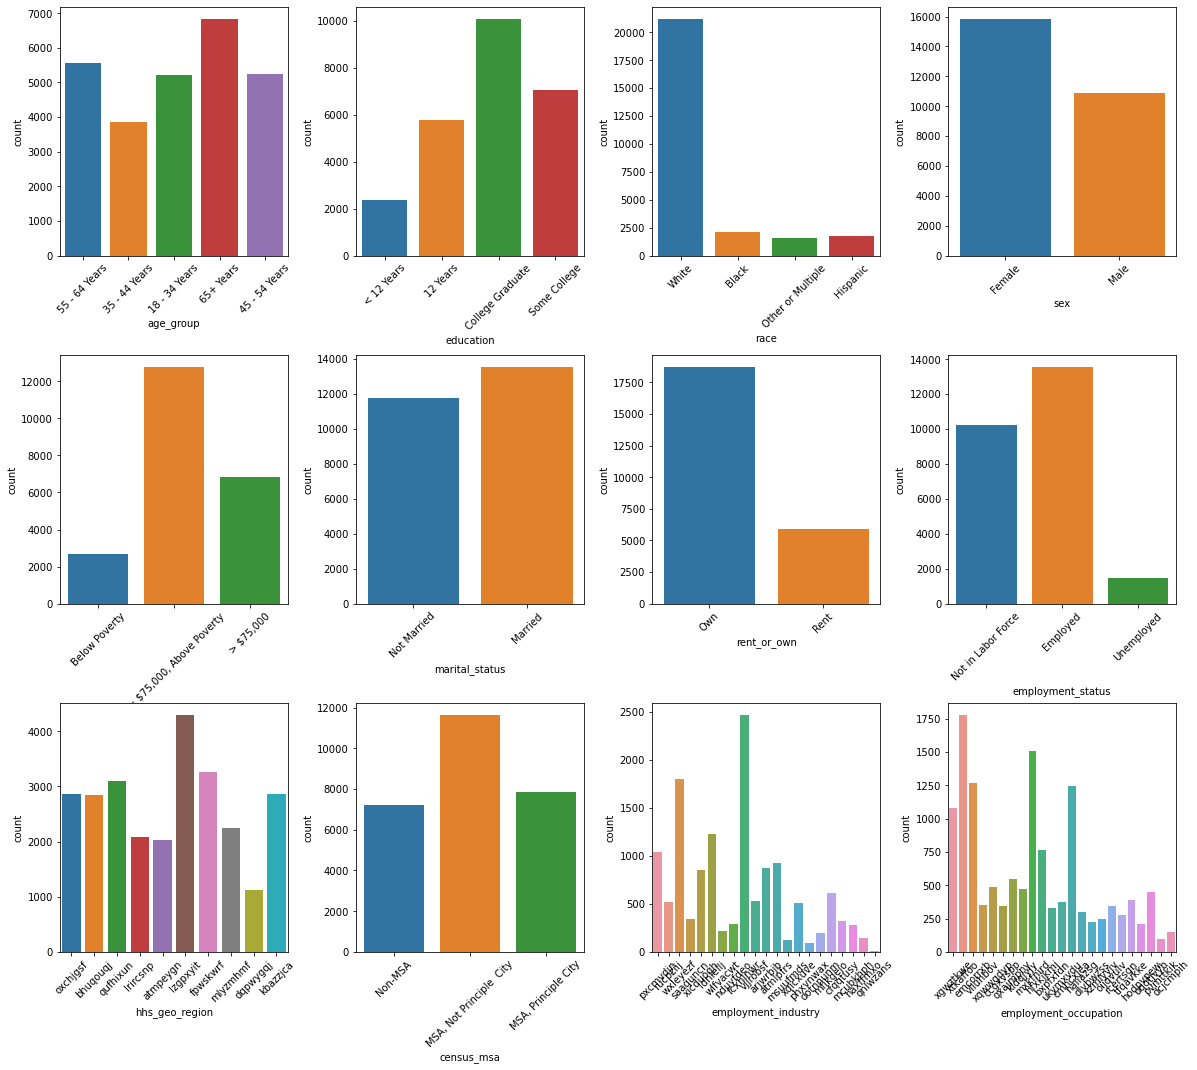

In [14]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(train_cat.columns, ax.flatten()):
    sns.countplot(train_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)    

**Observations:**
- Some of the variables are hard to interpret, since they have random strings attached to them
- It seems like the selection has been biased towards white people with college education above poverty
- `marital_status` seems to have the lowest variation and might not serve as well as a predictor in the model, but for now we will keep it

#### Relationship with target variables
For the relationship with the target variable, we will leave out the variables `hhs_geo_region`, `employment_industry`, `employment_occupation`, since we cannot interpret their values very well. <br>

All features seem to be of categorical, i.e. discrete nature. Even though the variables are encoded in numerical values, they represent different opinions on topics related to the vaccine. They are therefore in their nature **not continuous**. 
We will therefore treat our numerical features as if they were categorical features. 



In [15]:
# Leave out mentioned variables
leave_out = train_df[['hhs_geo_region', 'employment_industry', 'employment_occupation']]
train_cat_target = train_cat.drop(leave_out, axis=1)

## 2. Preprocessing 
In this part of the analysis, we will be looking at and try to find solutions for: 
- missing values and all those values that are falsely labeled, but are missing values (like some of the rather strangely looking labels in for example *employment_industry* or *employment occupation*) 
- Outliers and noise
- Encoding of categorical data

### 2.1 Missing values
Does our dataset have missing values? If yes: 
- How much data is missing?
- Which features have the most missing values? 
- Can we impute the data? What's the best way to impute the missing values? 

,variable,Unique values,Nan %,zeros %
34,employment_occupation,24,75.2,0.0
33,employment_industry,22,75.0,0.0
14,health_insurance,3,73.0,3.3
25,income_poverty,4,58.3,0.0
10,doctor_recc_seasonal,3,54.0,30.8
9,doctor_recc_h1n1,3,54.0,35.8
27,rent_or_own,3,53.8,0.0
28,employment_status,4,52.7,0.0
26,marital_status,3,52.6,0.0
22,education,5,52.6,0.0


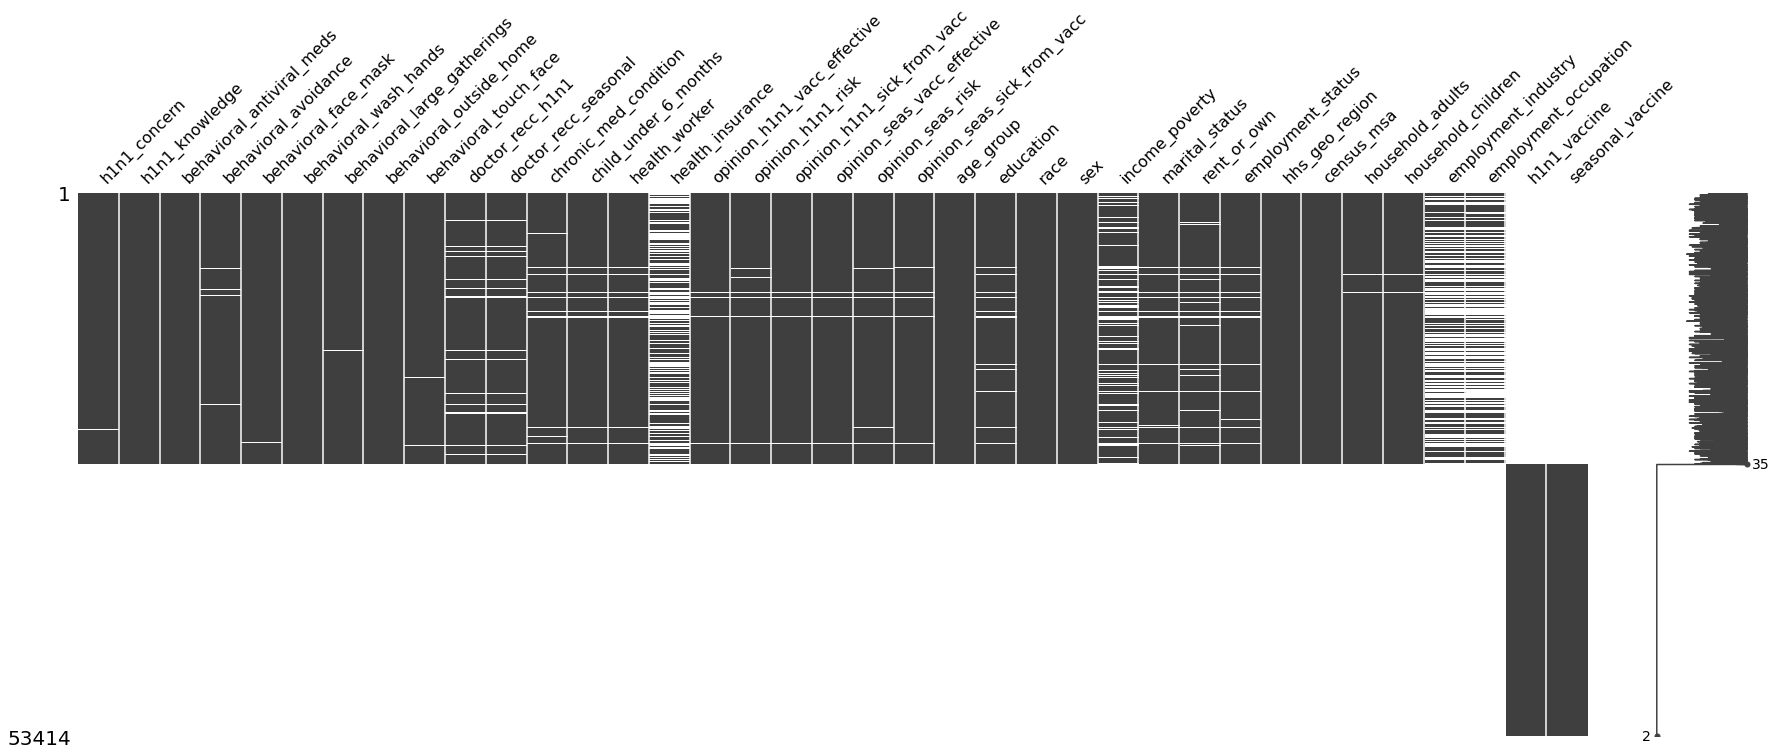

In [16]:
# Plot missing values
msno.matrix(train_df, figsize = (30,10))

def missing_values(data):
    df = pd.DataFrame()
    for col in list(data):
        unique_values = data[col].unique()
        try:
            unique_values = np.sort(unique_values)
        except:
            pass
        nans = round(pd.isna(data[col]).sum()/data.shape[0]*100, 1)
        zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)
        #empty = round((data[data[col]] == '').sum()/data.shape[0]*100, 1)
        df = df.append(pd.DataFrame([col,
                                     len(unique_values),
                                     nans,
                                     zeros,
                                     #empty
                                    ]).T, ignore_index = True)

    return df.rename(columns = {0: 'variable',
                                1: 'Unique values',
                                2: 'Nan %',
                                3: 'zeros %',
                                #4: 'empty'
                               }).sort_values('Nan %', ascending=False)

missing_values(train_df)

From the table above when can see that all variables have missing values, with `employment_industry`, `employment_occupation` and and `health_insurance` being the ones with most missing values. For now we will leave those features out and impute the missing values of the remaining features. 

In [17]:
# create copy of original df and remove features with high missing values 
train_df2 = train_df.copy()
train_df2.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1, inplace=True)

categorical_cols = [colname for colname in train_df2.columns if train_df2[colname].dtype == "object"]
numerical_cols = [colname for colname in train_df2.columns if train_df2[colname].dtype  in ['int64', 'float64']]

### 2.2 Preprocessing pipeline
Instead of doing our preprocessing manually, we will use a pipeline. It will: 
- Impute missing values of numerical features with KNNImputer
- Scale numerical features
- Impute missing values of categorical features with mode
- OHE categorical variables

**As far as the encoding goes:**<br>
Most of our data has alread been encoded, i.e. the answers are not represented as actual answers, but as numbers. Either 0 or 1 (for binary variables) or form 0 to 5 (for multiclass variables). 
However there are a few categories left, that have to be encoded. 

The variables don't have a high cardinality, so we will use **one-hot encoding** (OHE). 
What OHE does is, it creates a binary variable for each label of a categorical variable. 
We will end up with n-1 new feature for each original feature, where n = the number of labels of the feature.

In [67]:
train_df2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,NaN,NaN
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,NaN,NaN
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [73]:
# Train test split 
## Remove y from X
X = train_df2.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = train_df2[['h1n1_vaccine', 'seasonal_vaccine']]

## Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
# Create pipeline

## Numerical features
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler()
)

## Categorical features
from sklearn.impute import SimpleImputer

OHE = OneHotEncoder(handle_unknown='ignore')
imputer = SimpleImputer(strategy='most_frequent')


categorical_transformer = make_pipeline(
     OHE,
    SimpleImputer(strategy='most_frequent')
)

## Combine both steps 
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', [OHE, imputer], categorical_cols)
    ])


In [ ]:
# Create model
random_forest = 

pipe = make_pipeline(
    preprocessor, 
    )

### 2.3 Outliers 
Since we don't have real numerical data, because, as we said before, our numerical values are actually encoded categories for the answers of you survey, we won't find any outliers in our values. 
In other words, because the maximum value for our numerical (encoded) variables is either 1 or 5, there won't be any values that are very far awat from them. 

## 3 Feature Engineering and Selection
- Can we create new features? 
- Which variables can be removed? 

We've already removed some variables with a high percentage of missing values. 
Here we will look at the amount of variation per variable, pairwise correlatino with a scattermatrix, 
multicollinearity and we will perform a PCA. 